# Executing a linear regression on speed dating data.

The dataset came from a speed dating study by Professors Ray Fisman and Sheena Iyengar conducted on Columbia University graduate students between 2002 and 2004.

In [1]:
#import libraries needed for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Read in data that has columns such as age, sex, bmi, insurance cost etc. 
#Data comes from here: http://www.stat.columbia.edu/~gelman/arm/examples/speed.dating/
#But we willl use a simplified version: https://github.com/keithmcnulty/speed_dating/blob/master/speed_data_data.csv
data = pd.read_csv('speed_dating_data.csv')
data = data.dropna()

In [3]:
data.head()

,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
0,0,21.0,69487.0,2.0,lawyer,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0
1,0,21.0,69487.0,2.0,lawyer,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0
3,0,21.0,69487.0,2.0,lawyer,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0
4,0,21.0,69487.0,2.0,lawyer,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0
5,0,21.0,69487.0,2.0,lawyer,0,4.0,9.0,7.0,4.0,6.0,4.0,6.0,5.0,2.0


In [4]:
data.columns
#Column definitions:
# Dec: whether a match or not (1=yes, 0=no)
#sinc: sincerity, intel:intelligence, amb:ambitious, shar:shared interest, 
#like: overall rating, prob:How probable do you think it is that this person will say 'yes' for you
#met: Have you met this person before? 1=yes, 2= no
#attr: attractiveness
#gender codes: 0-females, 1-males


Index(['gender', 'age', 'income', 'goal', 'career', 'dec', 'attr', 'sinc',
       'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met'],
      dtype='object')

In [5]:
data.dtypes

gender      int64
age       float64
income    float64
goal      float64
career     object
dec         int64
attr      float64
sinc      float64
intel     float64
fun       float64
amb       float64
shar      float64
like      float64
prob      float64
met       float64
dtype: object

In [6]:
#finding correlation between decision and other variables
data.corr()['dec'].sort_values()

age      -0.003606
income    0.027256
goal      0.051886
met       0.054046
gender    0.094842
amb       0.193137
intel     0.228959
sinc      0.243621
prob      0.299304
shar      0.419150
fun       0.426429
attr      0.499752
like      0.521923
dec       1.000000
Name: dec, dtype: float64

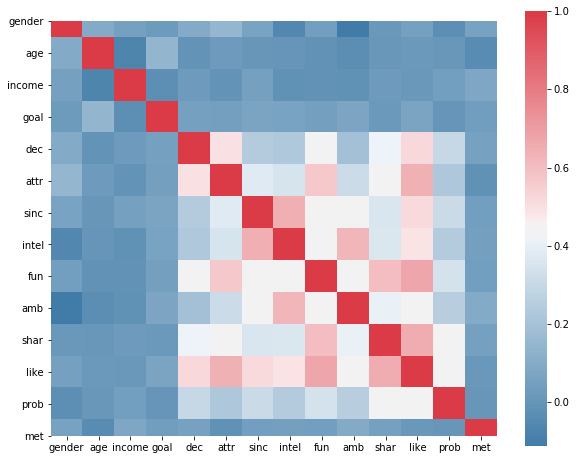

In [7]:
#Plotting a correlation plot. It tells us that none of the variables are really high. So we can run the regression on all of these variables.
#if one of the factors was as high as 0.75, we could have removed that variable to find out relationship with other variables

f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

# Basic linear regression

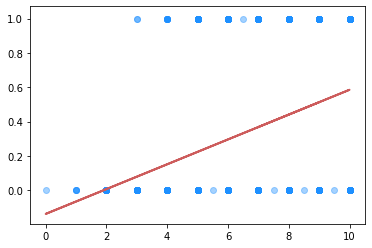

In [8]:
#Make a linear regression between matching decision and intelligence

#setting variables
x = data[['intel']].values
y = data[['dec']].values

### init the regression
my_regression = LinearRegression()

### fit our variables into it
my_regression.fit(x,y)

### make the scatter in Blue
plt.scatter(x,y,color='dodgerblue',alpha=.4)

### draw regression in red
## predict where the y is based on x
plt.plot(x, my_regression.predict(x), color='indianred', linewidth='2')

Intelligence is not really a deciding factor in dating as there is no distinctive relationship between the two. It could be partly because the study was conducted at Columbia University where every student could be presumed as intelligent.

# Set up our stats model

In [9]:
## set up for stats models
x_stats = data[['intel']].values
y_stats = data[['dec']].values

x_stats = sm.add_constant(x_stats)

## create and print the linear model
my_model = sm.OLS(y_stats, x_stats).fit()
my_predictions = my_model.predict(x_stats)

my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     193.6
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           7.17e-43
Time:                        23:22:17   Log-Likelihood:                -2382.0
No. Observations:                3501   AIC:                             4768.
Df Residuals:                    3499   BIC:                             4780.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1374      0.040     -3.453      0.001      -0.215      -0.059
x1             0.0723      0.005     13.913      0.000       0.062       0.082
==============================================================================
Omnibus:                    15799.614   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              481.761
Skew:                           0.334   Prob(JB):                    2.44e-105
Kurtosis:                       1.310   Cond. No.                         38.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#setting up the model for multiple regression
x_stats = data[['gender', 'age', 'income', 'goal', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met']].values
y_stats = data[['dec']].values

x_stats = sm.add_constant(x_stats)

## create and print the linear model
my_model = sm.OLS(y_stats, x_stats).fit()
my_predictions = my_model.predict(x_stats)

## r-squared explains the strength of the relationship between our model and the outcome
## so here the relationship is 9%, which is not good at all

my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     141.1
Date:                Wed, 18 Mar 2020   Prob (F-statistic):          6.00e-308
Time:                        23:22:17   Log-Likelihood:                -1736.4
No. Observations:                3501   AIC:                             3501.
Df Residuals:                    3487   BIC:                             3587.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5026      0.065     -7.758      0.000      -0.630      -0.376
x1             0.0307      0.014      2.163      0.031       0.003       0.059
x2            -0.0032      0.002     -1.643      0.101      -0.007       0.001
x3          4.141e-07   3.93e-07      1.055      0.292   -3.56e-07    1.18e-06
x4             0.0087      0.005      1.838      0.066      -0.001       0.018
x5             0.0694      0.005     14.670      0.000       0.060       0.079
x6            -0.0180      0.005     -3.314      0.001      -0.029      -0.007
x7             0.0027      0.007      0.403      0.687      -0.010       0.016
x8             0.0170      0.005      3.344      0.001       0.007       0.027
x9            -0.0206      0.005     -4.096      0.000      -0.030      -0.011
x10            0.0199      0.005      4.381      0.000       0.011       0.029
x11            0.0673      0.006     10.769      0.000       0.055       0.080
x12            0.0212      0.004      5.911      0.000       0.014       0.028
x13            0.0254      0.007      3.661      0.000       0.012       0.039
==============================================================================
Omnibus:                     1070.226   Durbin-Watson:                   1.538
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.686
Skew:                           0.047   Prob(JB):                     2.86e-36
Kurtosis:                       1.945   Cond. No.                     4.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Attractiveness plays a major role in matching, so does overall 'like' rating. Does this relationship change for men and women?

In [11]:
females = data[data['gender'] == 0]
males = data[data['gender'] == 1]

In [12]:
#setting up the model for multiple regression
x_stats = females[['age', 'income', 'goal', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met']].values
y_stats = females[['dec']].values

x_stats = sm.add_constant(x_stats)

## create and print the linear model
my_model = sm.OLS(y_stats, x_stats).fit()
my_predictions = my_model.predict(x_stats)

## r-squared explains the strength of the relationship between our model and the outcome
my_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     81.79
Date:                Wed, 18 Mar 2020   Prob (F-statistic):          1.22e-163
Time:                        23:22:17   Log-Likelihood:                -983.99
No. Observations:                2015   AIC:                             1994.
Df Residuals:                    2002   BIC:                             2067.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4221      0.090     -4.715      0.000      -0.598      -0.247
x1            -0.0071      0.003     -2.625      0.009      -0.012      -0.002
x2          2.603e-07      5e-07      0.521      0.603    -7.2e-07    1.24e-06
x3             0.0190      0.006      3.082      0.002       0.007       0.031
x4             0.0561      0.006      9.476      0.000       0.044       0.068
x5            -0.0104      0.007     -1.536      0.125      -0.024       0.003
x6             0.0141      0.009      1.620      0.105      -0.003       0.031
x7             0.0224      0.007      3.370      0.001       0.009       0.035
x8            -0.0206      0.007     -3.155      0.002      -0.033      -0.008
x9             0.0249      0.006      4.280      0.000       0.013       0.036
x10            0.0530      0.008      6.425      0.000       0.037       0.069
x11            0.0177      0.005      3.768      0.000       0.008       0.027
x12            0.0107      0.009      1.182      0.237      -0.007       0.029
==============================================================================
Omnibus:                      850.186   Durbin-Watson:                   1.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.442
Skew:                           0.163   Prob(JB):                     3.83e-25
Kurtosis:                       1.890   Cond. No.                     4.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#setting up the model for multiple regression
x_stats = males[['age', 'income', 'goal', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met']].values
y_stats = males[['dec']].values

x_stats = sm.add_constant(x_stats)

## create and print the linear model
my_model = sm.OLS(y_stats, x_stats).fit()
my_predictions = my_model.predict(x_stats)

## r-squared explains the strength of the relationship between our model and the outcome

my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     73.26
Date:                Wed, 18 Mar 2020   Prob (F-statistic):          2.72e-140
Time:                        23:22:17   Log-Likelihood:                -725.76
No. Observations:                1486   AIC:                             1478.
Df Residuals:                    1473   BIC:                             1546.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5656      0.095     -5.933      0.000      -0.753      -0.379
x1             0.0002      0.003      0.086      0.931      -0.005       0.006
x2          6.672e-07   6.39e-07      1.044      0.297   -5.87e-07    1.92e-06
x3            -0.0038      0.007     -0.513      0.608      -0.018       0.011
x4             0.0921      0.008     11.712      0.000       0.077       0.107
x5            -0.0281      0.009     -3.127      0.002      -0.046      -0.010
x6            -0.0119      0.010     -1.163      0.245      -0.032       0.008
x7             0.0154      0.008      1.923      0.055      -0.000       0.031
x8            -0.0258      0.008     -3.235      0.001      -0.042      -0.010
x9             0.0141      0.007      1.943      0.052      -0.000       0.028
x10            0.0816      0.010      8.448      0.000       0.063       0.101
x11            0.0256      0.006      4.586      0.000       0.015       0.037
x12            0.0447      0.011      4.138      0.000       0.023       0.066
==============================================================================
Omnibus:                      171.634   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.339
Skew:                          -0.104   Prob(JB):                     1.93e-11
Kurtosis:                       2.132   Cond. No.                     4.58e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Attractiveness has more weight among men verus women, while intelligence has more weight among women. In fact, it is negative among men.

Let us run these models for intelligence and attractiveness

In [14]:
#setting up the model for multiple regression
x_stats = males[['attr', 'intel']].values
y_stats = males[['dec']].values

x_stats = sm.add_constant(x_stats)

## create and print the linear model
my_model = sm.OLS(y_stats, x_stats).fit()
my_predictions = my_model.predict(x_stats)

## r-squared explains the strength of the relationship between our model and the outcome

my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     271.3
Date:                Wed, 18 Mar 2020   Prob (F-statistic):          3.93e-101
Time:                        23:22:17   Log-Likelihood:                -841.84
No. Observations:                1486   AIC:                             1690.
Df Residuals:                    1483   BIC:                             1706.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4432      0.059     -7.528      0.000      -0.559      -0.328
x1             0.1440      0.007     21.602      0.000       0.131       0.157
x2            -0.0053      0.008     -0.662      0.508      -0.021       0.010
==============================================================================
Omnibus:                      432.210   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.659
Skew:                          -0.013   Prob(JB):                     1.23e-15
Kurtosis:                       1.947   Cond. No.                         54.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#setting up the model for multiple regression
x_stats =females[['attr', 'intel']].values
y_stats = females[['dec']].values

x_stats = sm.add_constant(x_stats)

## create and print the linear model
my_model = sm.OLS(y_stats, x_stats).fit()
my_predictions = my_model.predict(x_stats)

## r-squared explains the strength of the relationship between our model and the outcome

my_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     319.4
Date:                Wed, 18 Mar 2020   Prob (F-statistic):          3.43e-121
Time:                        23:22:17   Log-Likelihood:                -1108.1
No. Observations:                2015   AIC:                             2222.
Df Residuals:                    2012   BIC:                             2239.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5257      0.048    -11.065      0.000      -0.619      -0.432
x1             0.1050      0.005     21.198      0.000       0.095       0.115
x2             0.0353      0.006      5.613      0.000       0.023       0.048
==============================================================================
Omnibus:                      859.013   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.409
Skew:                           0.305   Prob(JB):                     6.51e-30
Kurtosis:                       1.892   Cond. No.                         50.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It is clear from these two that intelligence plays a bigger role for women in speed dating. The model can't be trusted given our r-squared values are low. We need more data to confirm this relationship.